In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combine = pd.merge(mouse_metadata, study_results, how='outer', on=["Mouse ID","Mouse ID"])
# Display the data table for preview
Combine.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [59]:
# Checking the number of mice.
total_number_of_mice = len(Combine["Mouse ID"].unique())
males = len(Combine["Sex"])
print(males)
print(total_number_of_mice)

1893
249


In [60]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = Combine.loc[Combine.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
optional_duplicate_mice = Combine.loc[Combine["Mouse ID"] == "g989", :]
optional_duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned = Combine[Combine['Mouse ID'].isin(optional_duplicate_mice)==False]
#cleaned.head(-1)
cleaned = Combine.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [37]:
# Checking the number of mice in the clean DataFrame.
cleaned_count = cleaned["Mouse ID"]
cleaned_count

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1888, dtype: object

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = Combine['Tumor Volume (mm3)'].groupby(Combine['Drug Regimen']).mean()
median = Combine['Tumor Volume (mm3)'].groupby(Combine['Drug Regimen']).median()
var = Combine['Tumor Volume (mm3)'].groupby(Combine['Drug Regimen']).var()
std = Combine['Tumor Volume (mm3)'].groupby(Combine['Drug Regimen']).std()
sem = Combine['Tumor Volume (mm3)'].groupby(Combine['Drug Regimen']).sem()

statistics_table = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                            "Tumor Volume Variance":var, 
                            "Tumor Volume Std. Dev.":std, 
                            "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
statistics_table.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary =  Combine.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0.5, 1.0, 'Number of Mice per Treatment')

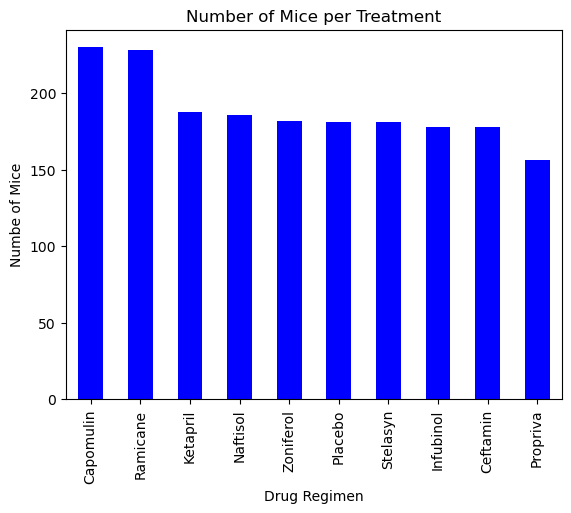

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_on_drugs = cleaned["Drug Regimen"].value_counts()
bar_plot = mice_on_drugs.plot.bar(color = 'b')
plt.xlabel("Drug Regimen")
plt.ylabel("Numbe of Mice")
plt.title("Number of Mice per Treatment")


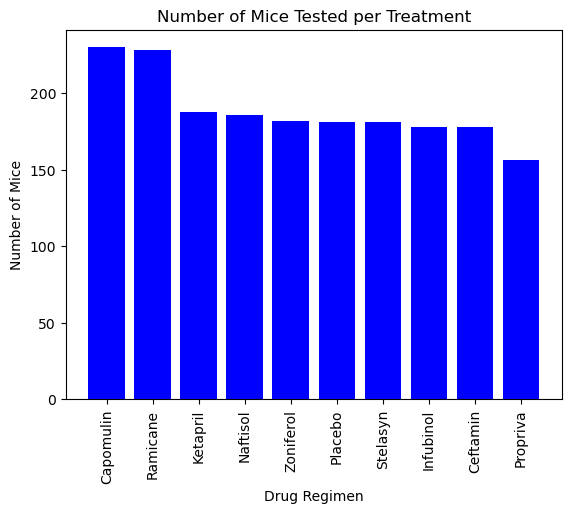

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_on_drugs.index.values
y_axis = mice_on_drugs.values


plt.bar(x_axis, y_axis, color='b')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

<AxesSubplot:title={'center':'Female vs Male Population'}, ylabel='Sex'>

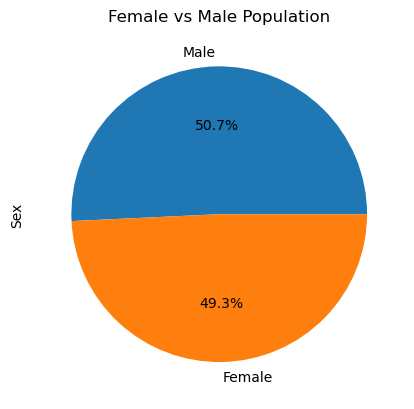

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = cleaned["Sex"].value_counts()
gender.plot.pie(title="Female vs Male Population", autopct='%1.1f%%')



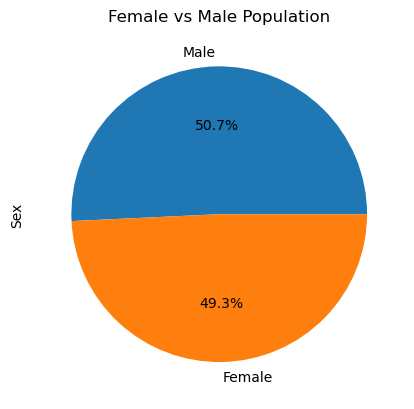

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.title("Female vs Male Population")
labels = list(gender.index)
plt.pie(gender,labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_greatest_timepoint = Combine.groupby(["Mouse ID"])["Timepoint"].max()
last_greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_id_timepoint = pd.merge(last_greatest_timepoint, Combine, on=(["Mouse ID","Timepoint"]))
merge_id_timepoint.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in tumor_treatments:
    regimen = merge_id_timepoint.loc[merge_id_timepoint["Drug Regimen"] == treatment]
    vol= regimen['Tumor Volume (mm3)']
    tumor_data.append(vol)

In [46]:
# Determine outliers using upper and lower bounds
quart0 = tumor_data[0].quantile([.25,.5,.75])
lowerq0 = quart0[0.25]
upperq0 = quart0[0.75]
IQR0 = upperq0-lowerq0
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

quart1 = tumor_data[1].quantile([.25,.5,.75])
lowerq1 = quart1[0.25]
upperq1 = quart1[0.75]
IQR1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

quart2 = tumor_data[2].quantile([.25,.5,.75])
lowerq2 = quart2[0.25]
upperq2 = quart2[0.75]
IQR2 = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

quart3 = tumor_data[3].quantile([.25,.5,.75])
lowerq3 = quart3[0.25]
upperq3 = quart3[0.75]
IQR3 = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

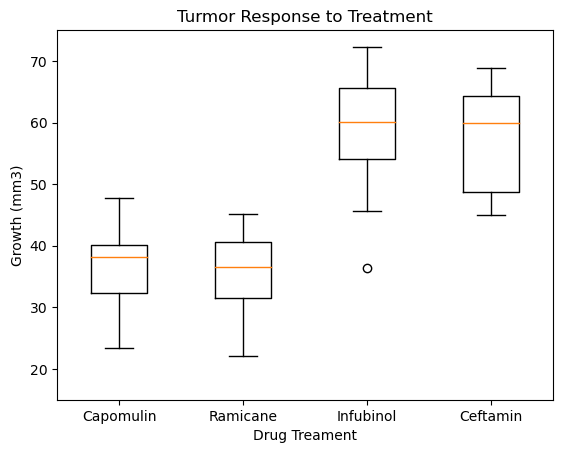

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
BoxPlot, plot = plt.subplots()
plot.set_title('Turmor Response to Treatment')
plot.set_ylabel('Growth (mm3)')
plot.set_xlabel("Drug Treament")
plt.ylim(15, 75)
plot.boxplot(tumor_data, labels = tumor_treatments)
plt.show()

In [48]:
capomulin_cleaned = cleaned.loc[cleaned["Drug Regimen"] == "Capomulin"]
capomulin_cleaned.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

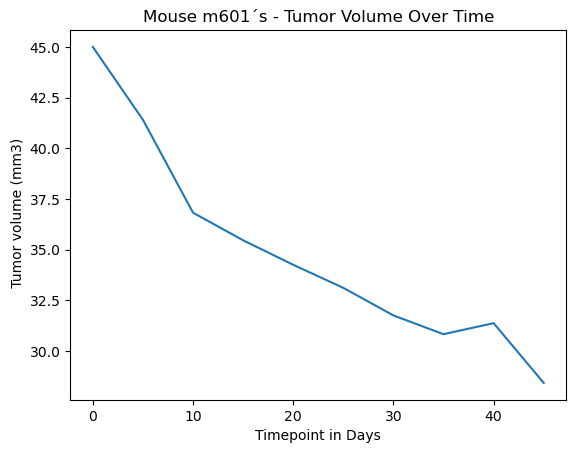

In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_m601 = cleaned.loc[cleaned["Mouse ID"] == "m601"]

y = mouse_m601["Tumor Volume (mm3)"]
x = mouse_m601["Timepoint"]

plt.plot(x, y, label="Tumor volume", linestyle = "solid")

plt.title( "Mouse m601´s - Tumor Volume Over Time")
plt.xlabel("Timepoint in Days")
plt.xticks(np.arange(min(x), max(x)+1, 10))
plt.ylabel(" Tumor volume (mm3)")
plt.show()




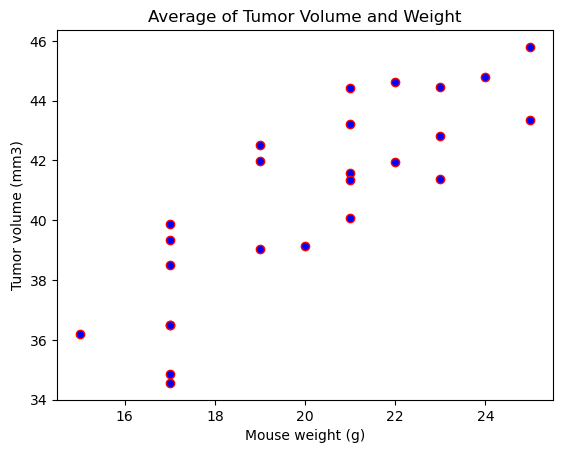

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg_mouse =capomulin_cleaned.groupby(["Mouse ID"]).mean()
capomulin_avg_mouse.head()

capomulin_avg_mouse_tumor = capomulin_avg_mouse["Weight (g)"]
capomulin_avg_mouse_weight = capomulin_avg_mouse["Tumor Volume (mm3)"]

plt.scatter(capomulin_avg_mouse_tumor, capomulin_avg_mouse_weight, marker="o", facecolors="blue", edgecolors="red")
plt.title( "Average of Tumor Volume and Weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
plt.show()

Text(5, 10, 'y = 0.95x + 21.55')

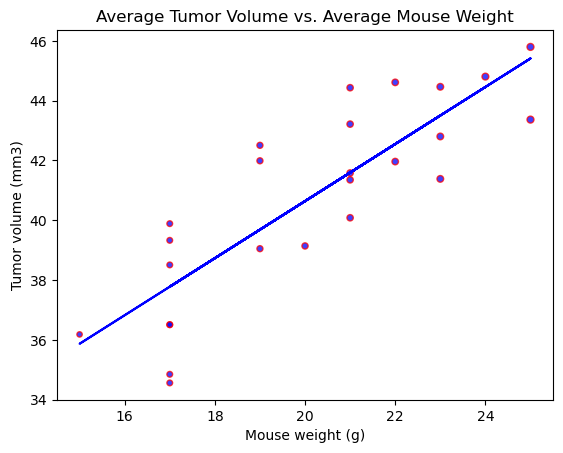

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_avg_mouse_tumor,capomulin_avg_mouse_weight)
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_avg_mouse_tumor, capomulin_avg_mouse_weight)
regress_values = capomulin_avg_mouse_tumor * slope + intercept

plt.scatter(capomulin_avg_mouse_tumor, capomulin_avg_mouse_weight, marker="o", facecolors="blue", edgecolors="red",
            s=capomulin_avg_mouse_tumor, alpha=0.75)
plt.plot(capomulin_avg_mouse_tumor,regress_values,"b-")
plt.title( "Average Tumor Volume vs. Average Mouse Weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,10),fontsize=15,color="blue")
